<a href="https://colab.research.google.com/github/morozjulia111/Peer-Graded-Assignment/blob/main/AIRBNB_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIRBNB EXPLORATORY ANALYSIS



In [ ]:
# presented August 15, 2024

In [ ]:
# importing libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
import plotly.express as px
from wordcloud import WordCloud
! pip install pywaffle Waffle
from pywaffle import Waffle

In [ ]:
# importing from CSV file
filepath='/content/Airbnb_Open_Data.csv'
df = pd.read_csv(filepath)

<ipython-input-3-f98ce59507b4>:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


In [ ]:
# quick look at variables + info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [ ]:
# sample view of data
df.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0    7/5/2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

In [ ]:
# numeric statistics
df.describe()

id       host id            lat           long  \
count  1.025990e+05  1.025990e+05  102591.000000  102591.000000   
mean   2.914623e+07  4.925411e+10      40.728094     -73.949644   
std    1.625751e+07  2.853900e+10       0.055857       0.049521   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.508581e+07  2.458333e+10      40.688740     -73.982580   
50%    2.913660e+07  4.911774e+10      40.722290     -73.954440   
75%    4.320120e+07  7.399650e+10      40.762760     -73.932350   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   

       Construction year  minimum nights  number of reviews  \
count      102385.000000   102190.000000      102416.000000   
mean         2012.487464        8.135845          27.483743   
std             5.765556       30.553781          49.508954   
min          2003.000000    -1223.000000           0.000000   
25%          2007.000000        2.000000           1.000000   
50%          2012.000000        3.000000           7.000000   
75%          2017.000000        5.000000          30.000000   
max          2022.000000     5645.000000        1024.000000   

       reviews per month  review rate number  calculated host listings count  \
count       86720.000000       102273.000000                   102280.000000   
mean            1.374022            3.279106                        7.936605   
std             1.746621            1.284657                       32.218780   
min             0.010000            1.000000                        1.000000   
25%             0.220000            2.000000                        1.000000   
50%             0.740000            3.000000                        1.000000   
75%             2.000000            4.000000                        2.000000   
max            90.000000            5.000000                      332.000000   

       availability 365  
count     102151.000000  
mean         141.133254  
std          135.435024  
min          -10.000000  
25%            3.000000  
50%           96.000000  
75%          269.000000  
max         3677.000000

In [ ]:
# descriptive view of categorical variables
df.describe(include='object')

NAME host_identity_verified host name  \
count                102349                 102310    102193   
unique                61281                      2     13190   
top     Home away from home            unconfirmed   Michael   
freq                     33                  51200       881   

       neighbourhood group       neighbourhood        country country code  \
count               102570              102583         102067       102468   
unique                   7                 224              1            1   
top              Manhattan  Bedford-Stuyvesant  United States           US   
freq                 43792                7937         102067       102468   

       instant_bookable cancellation_policy        room type   price  \
count            102494              102523           102599  102352   
unique                2                   3                4    1151   
top               False            moderate  Entire home/apt   $206    
freq              51474               34343            53701     137   

       service fee last review house_rules   license  
count       102326       86706       50468         2  
unique         231        2477        1976         1  
top           $41    6/23/2019      #NAME?  41662/AL  
freq           526        2443        2712         2

In [ ]:
# Drop columns not relevant for this analysis.
df.drop(columns = ["license","house_rules","id","host id","host_identity_verified","NAME","availability 365"], inplace = True)

# Print object type, shape
print("df type:", type(df))
print("df shape:", df.shape)

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (102599, 19)


In [ ]:
# Drop null values
df.dropna(inplace = True)
print("df type:", type(df))
print("df shape:", df.shape)

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (84383, 19)


In [ ]:
# correct spelling for neighbourhood group
replace={'brookln':'Brooklyn','manhatan':'Manhattan'}
df['neighbourhood group']=df['neighbourhood group'].replace(replace)

In [ ]:
# correct spelling neighbourhoods
replace={'Bay Terrace, Staten Island':'Bay Terrace',
         'Chelsea, Staten Island':'Chelsea',
         'Clifton':'Clifton Hill'}
df['neighbourhood']=df['neighbourhood'].replace(replace)

In [ ]:
# removing duplicates
df=df.drop_duplicates(keep='first')

print("df type:", type(df))
print("df shape:", df.shape)

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (78365, 19)


In [ ]:
# change year to int data type -> prepare for area plot, line plot
df['Construction year'] = df['Construction year'].astype(int)


<ipython-input-13-38d5b44042c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Construction year'] = df['Construction year'].astype(int)


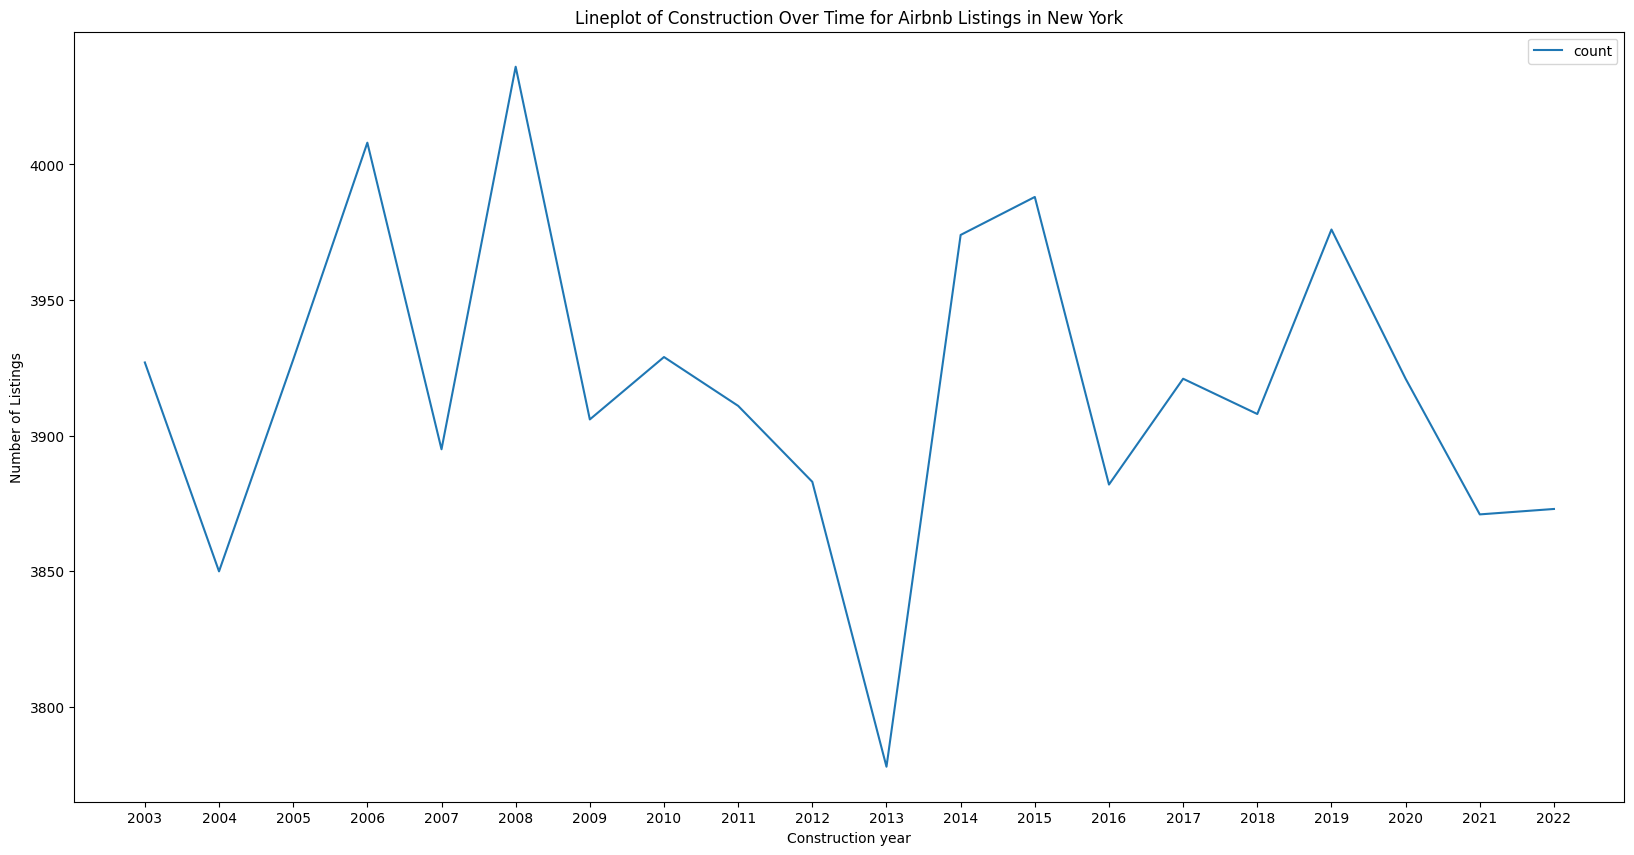

In [ ]:
# line plot - trend in construction over time (of listings)
df_c = df.groupby('Construction year')['country'].count().reset_index(name = 'count')
df_c.set_index('Construction year', inplace = True)

df_c.plot(kind = 'line', figsize = (20, 10))

plt.title('Lineplot of Construction Over Time for Airbnb Listings in New York')
plt.ylabel('Number of Listings')
plt.xlabel('Construction year')
plt.xticks(list(range(2003,2023)))

plt.show()

In [ ]:
# Pivot Table : neighbourhood group, construction year, count of listings
df_n = df[['neighbourhood group', 'Construction year']]
df_n = df_n.pivot_table(index='Construction year', columns='neighbourhood group',
                        aggfunc=len, fill_value=0)
df_n

neighbourhood group  Bronx  Brooklyn  Manhattan  Queens  Staten Island
Construction year                                                     
2003                   123      1632       1578     550             44
2004                   119      1556       1595     525             55
2005                    98      1675       1575     542             38
2006                   104      1603       1684     573             44
2007                   103      1599       1640     516             37
2008                    95      1700       1664     541             36
2009                   100      1613       1676     484             33
2010                   106      1629       1618     525             51
2011                   120      1617       1591     534             49
2012                   114      1596       1598     544             31
2013                    94      1549       1590     510             35
2014                   124      1636       1685     480             49
2015                    94      1698       1666     493             37
2016                   112      1561       1659     522             28
2017                    93      1680       1613     513             22
2018                   108      1609       1660     507             24
2019                    90      1696       1625     526             39
2020                   119      1648       1565     549             40
2021                   104      1535       1640     557             35
2022                   129      1626       1555     530             33

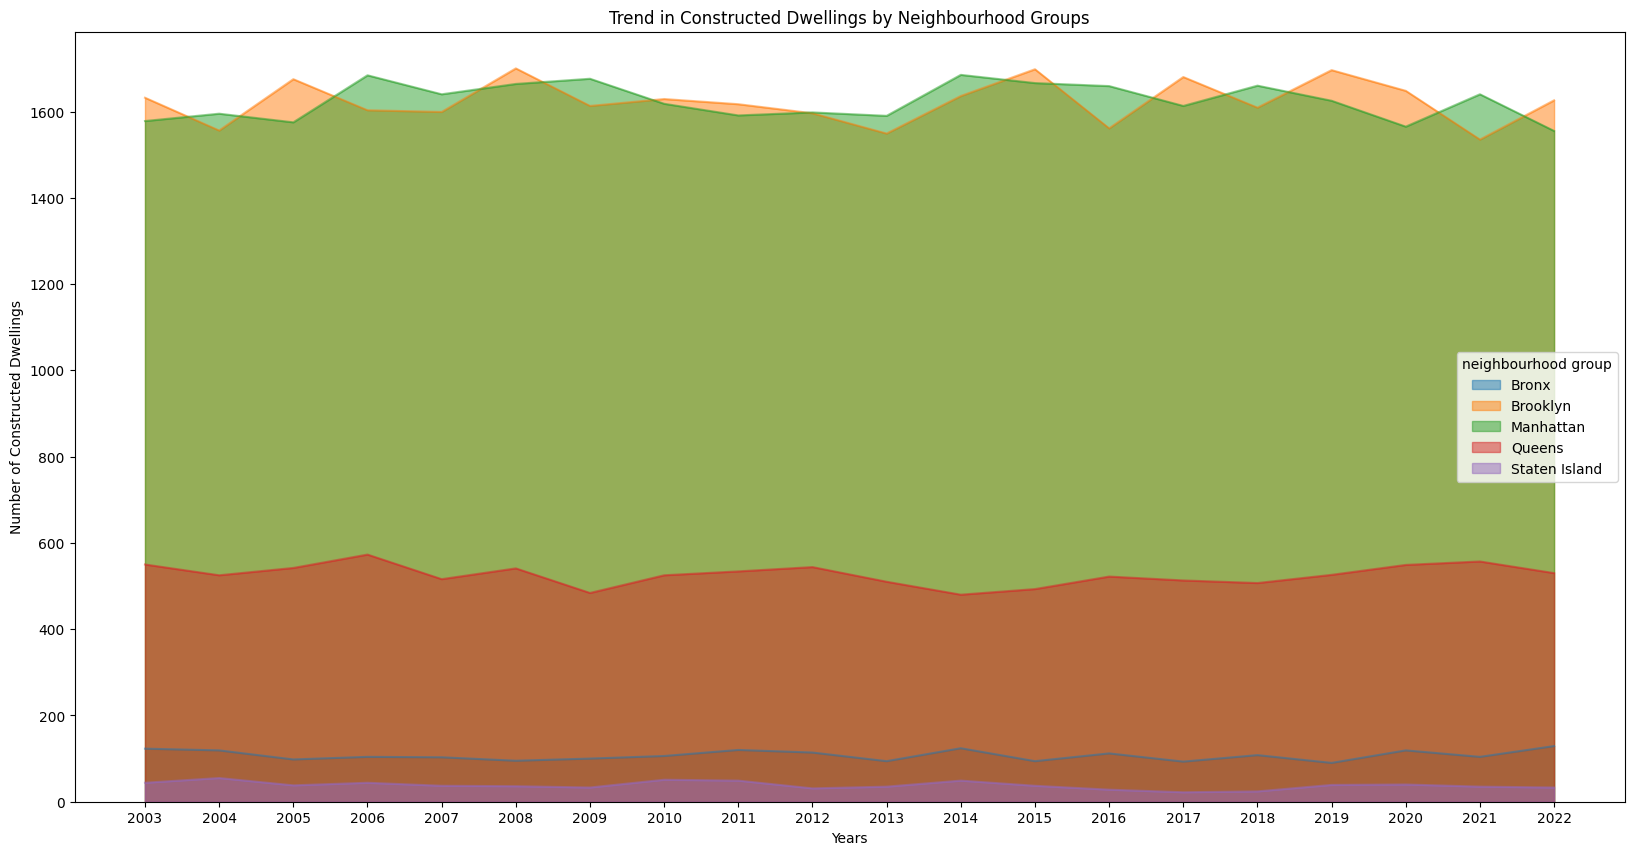

In [ ]:
# area plot - trend of construction of listings, by neighbourhood group
df_n.plot(kind = 'area',
          stacked = False,
          figsize = (20, 10))  # pass a tuple (x, y) size

plt.title('Trend in Constructed Dwellings by Neighbourhood Groups')
plt.ylabel('Number of Constructed Dwellings')
plt.xlabel('Years')
plt.xticks(list(range(2003,2023)))

plt.show()

In [ ]:
###########

In [ ]:
# Listings grouped by neighbourhood group -> Waffle Chart
df_NG = df.groupby('neighbourhood group')['lat'].count().reset_index(name = 'Count')
df_NG.set_index('neighbourhood group', inplace = True)

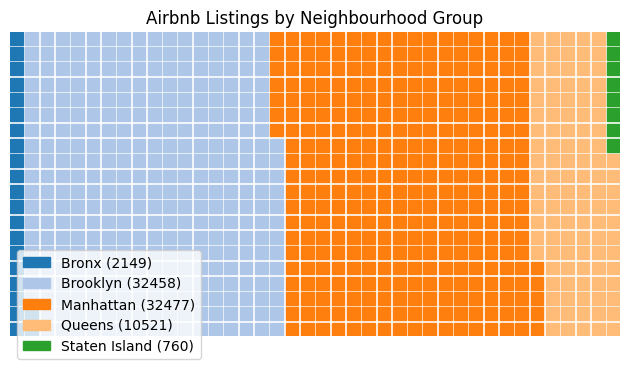

In [ ]:
# Waffle Chart - proportion of listings across neighbourhood groups

plt.figure(FigureClass = Waffle,
                 rows = 20, columns = 40,
                 values = df_NG['Count'], #pass the data to be used for display
                 cmap_name = 'tab20',
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_NG.index.values,df_NG.Count)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 1}
                )

plt.title('Airbnb Listings by Neighbourhood Group')

plt.show()

In [ ]:
# Map Chart of listings
fig = px.scatter_mapbox(
    df,
    lat= "lat",
    lon= "long",
    center={"lat": 40.7128, "lon": -74.0060},
    width=700,
    height=700,
    zoom=8,
    hover_data=["price"],
    color = 'neighbourhood group',
    title = 'Map of Listings in New York'
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

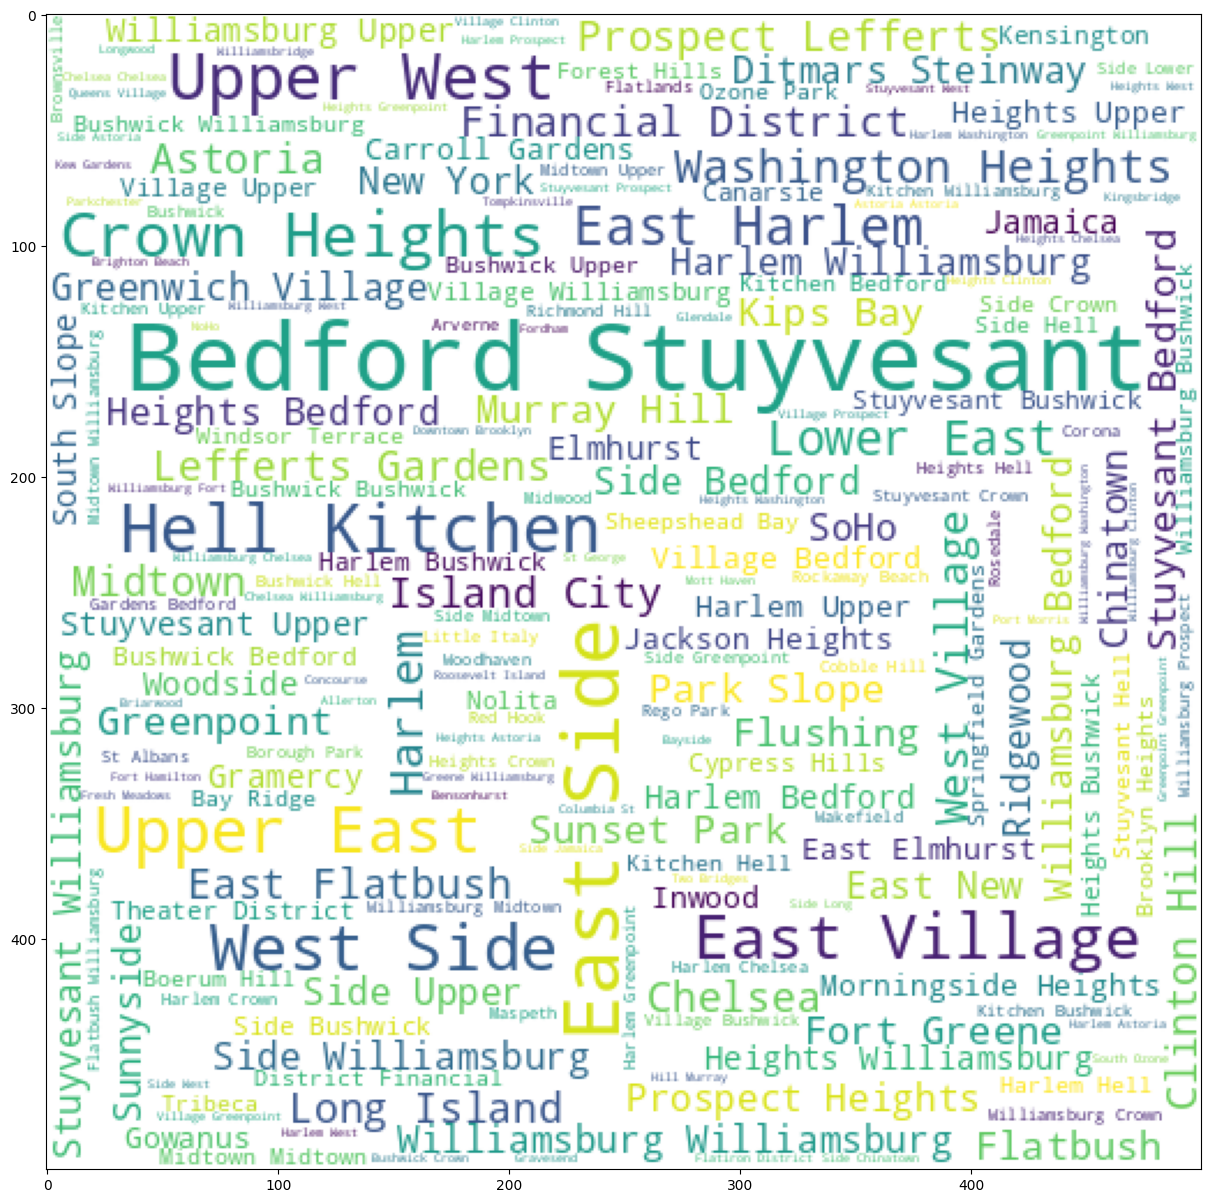

In [ ]:
# Wordcloud of neighbourhoods (within neighbourhood groups)
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=500,
                          height=500
                         ).generate(" ".join(df.neighbourhood))
plt.imshow(wordcloud)
plt.show()

In [ ]:
###############

In [ ]:
# Listings grouped by neighbourhood, neighbourhood group -- extract count
df_N = df.groupby(['neighbourhood group','neighbourhood'])['lat'].count().reset_index(name = 'Count')

In [ ]:
#Tree Map - frequency of listings in neighbourhoods within neighbourhood groups
px.treemap(df_N,
           path=['neighbourhood group', 'neighbourhood'],  # Define hierarchical structure
           values='Count',  # Size of each rectangle
           title='New York Airbnb Listings by Neighbourhood')

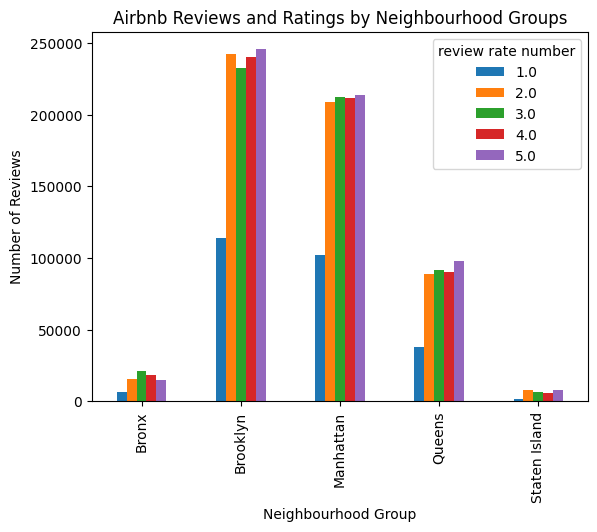

In [ ]:
# bar chart - review rating & number of reviews across neighbourhood groups (get a sense of visits)
df_rev = df.pivot_table(values='number of reviews', columns = 'review rate number', index='neighbourhood group', aggfunc='sum')

df_rev.plot(kind = 'bar')

plt.title('Airbnb Reviews and Ratings by Neighbourhood Groups')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Reviews')

plt.show()

In [ ]:
#########

In [ ]:
# change data type for price, service fee -> as an integer
df['price']=df['price'].str.replace('$','')
df['price']=df['price'].str.replace(',','')

df['price']=df['price'].astype(int)


df['service fee']=df['service fee'].str.replace('$','')
df['service fee']=df['service fee'].str.replace(',','')

df['service fee']=df['service fee'].astype(int)

In [ ]:
# BUBBLE CHART - ratings (bubble size), price, number of reviews

px.scatter(df[df['neighbourhood group']=='Staten Island'],
           x = 'price',
           y = 'number of reviews',
           color = 'room type',
           size = 'review rate number',
           hover_data = 'review rate number',
           title = 'Bubble Chart of Staten Island Airbnb Reviews')


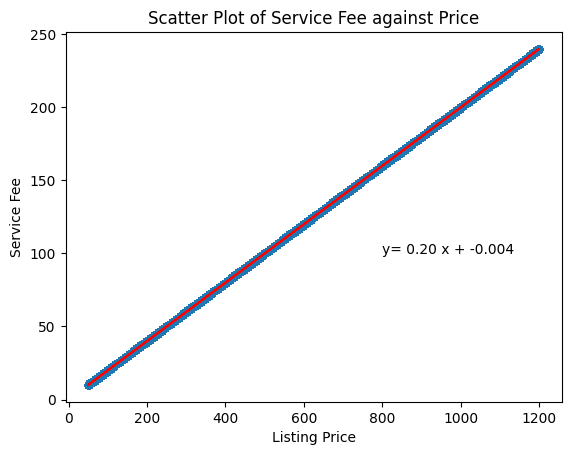

In [ ]:
# line of fit
X = df['price']
Y = df['service fee']
fit = np.polyfit(X, Y, deg=1)

# scatter plot of Service Fee against Price
df.plot(kind = 'scatter',
              x = 'price',
              y = 'service fee')

plt.title('Scatter Plot of Service Fee against Price')
plt.ylabel('Service Fee')
plt.xlabel('Listing Price')
plt.plot(X, fit[0] * X + fit[1], color='red') # line of it
plt.annotate('y= {0:.2f} x + {1:.3f}'.format(fit[0], fit[1]), xy = (800,100))

plt.show()

In [ ]:
##########

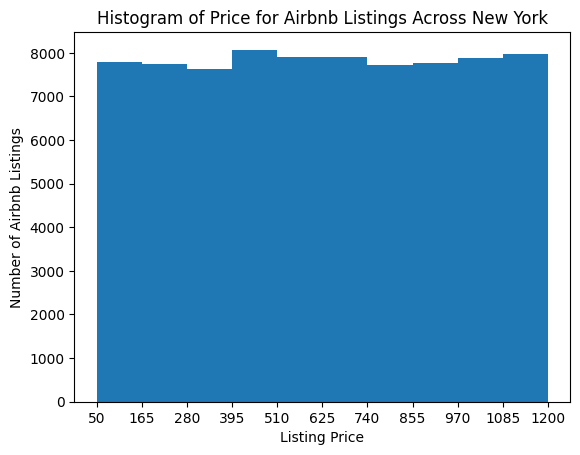

In [ ]:
# histogram : listings across price
count, bins = np.histogram(df['price'])

df['price'].plot(kind = 'hist', xticks = bins)

plt.title('Histogram of Price for Airbnb Listings Across New York')
plt.xlabel('Listing Price')
plt.ylabel('Number of Airbnb Listings')

plt.show()

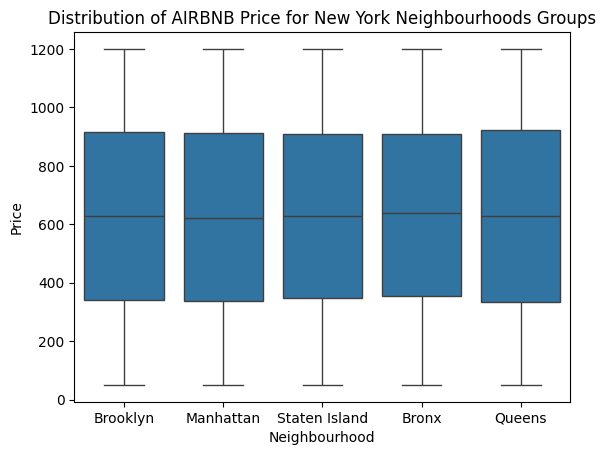

In [ ]:
# pd.set_option("display.max_columns", None)

# boxplot: distribution of price accross neighbourhood groups boxplots
sns.boxplot(x = df['neighbourhood group'], y = df['price'], data = df)

plt.title('Distribution of AIRBNB Price for New York Neighbourhoods Groups')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')

plt.show()

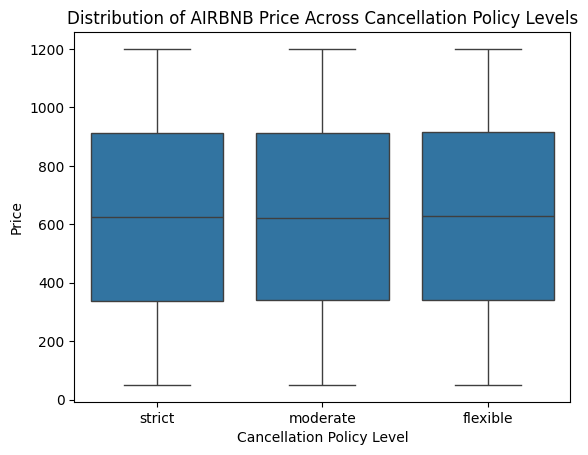

In [ ]:
# boxplot: distribution of price by cancellation policy
sns.boxplot(x = df['cancellation_policy'], y = df['price'], data = df)

plt.title('Distribution of AIRBNB Price Across Cancellation Policy Levels')
plt.xlabel('Cancellation Policy Level')
plt.ylabel('Price')

plt.show()

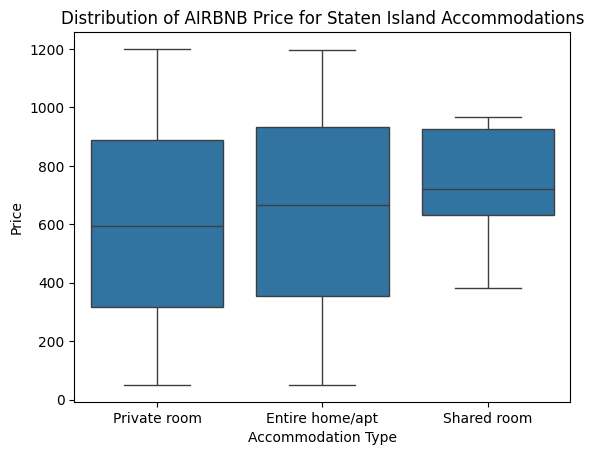

In [ ]:
# boxplot: distribution of price across room type, chosen for a neighbourhood group
df_temp = df[df['neighbourhood group'] == 'Staten Island']
sns.boxplot(x = df_temp['room type'], y = df_temp['price'], data = df)

plt.title('Distribution of AIRBNB Price for Staten Island Accommodations')
plt.xlabel('Accommodation Type')
plt.ylabel('Price')

plt.show()

In [ ]:
# Pie Chart: proportion of accommodation in Staten Island
df_acc = df[df['neighbourhood group']=='Staten Island']

dacc = df_acc.groupby('room type')['host name'].count().reset_index(name = 'count')
px.pie(dacc, values='count', names='room type', title="Staten Island : Accommodation Types")


In [ ]:
# saving dataframe to csv file
#df.to_csv('dashboard_file.csv')

In [ ]:
# Plotly Dashboard Script

# #Terminal commands

# #pip3.11 install setuptools
# #python3.11 -m pip install packaging
# #python3.11 -m pip install pandas dash
# #pip3 install httpx==0.20 dash plotly

# #python3.11 dashboard.py



# import pandas as pd
# import dash
# from dash import html, dcc
# from dash.dependencies import Input, Output, State
# import plotly.graph_objects as go
# import plotly.express as px
# from dash import no_update
# import datetime as dt

# #Create app
# app = dash.Dash(__name__)

# #Clear the layout and do not display exception till callback gets executed
# app.config.suppress_callback_exceptions = True

# # Read airbnb cleaned data
# df =  pd.read_csv('dashboard_file.csv')


# #Layout Section of Dash
# #Task 1 Add the Title to the Dashboard
# app.layout = html.Div(children=[html.H1('New York Airbnb Accommodations by Neighbourhood Group',
#                                 style={'textAlign': 'center', 'color': '#503D36',
#                                 'font-size': 26}),
# # TASK 2: Add the radio items and a dropdown right below the first inner division
#      #outer division starts
#      html.Div([

#                     #Dropdown to select neighbourhood
#                     html.Div([
#                             html.H2('Select Neighbourhood Group:', style={'margin-right': '2em'}),
#                         dcc.Dropdown(df['neighbourhood group'].unique(), value = 'Brooklyn',id='place')
#                     ]),
# #TASK 3: Add two empty divisions for output inside the next inner division.
#          #Second Inner division for adding 2 inner divisions for 2 output graphs
#                     html.Div([

#                         html.Div([ ], id='plot1'),
#                         html.Div([ ], id='plot2')
#                     ], style={'display': 'flex'}),

#     ])
#     #outer division ends
# ])

# #layout ends
# #TASK 4: Add the Ouput and input components inside the app.callback decorator.
# #Place to add @app.callback Decorator
# @app.callback([Output(component_id='plot1', component_property='children'),
#                Output(component_id='plot2', component_property='children')],
#                Input(component_id='place', component_property='value'))

# #TASK 5: Add the callback function.
# #Place to define the callback function .
# def reg_neighbourhood_display(input_neighbourhood):

#     ng_data = df[df['neighbourhood group']==input_neighbourhood]
#     #Plot one
#     acc_data = ng_data.groupby('room type')['host name'].count().reset_index(name = 'count')
#     fig1 = px.pie(acc_data, values='count', names='room type', title="{} : Accommodation Types".format(input_neighbourhood))

#     #Plot two
#     fig2 = px.box(ng_data, x='room type', y='price', title='Distribution of Price per Accommodation in {}'.format(input_neighbourhood))
#     return [dcc.Graph(figure=fig1), dcc.Graph(figure=fig2)]

# if __name__ == '__main__':
#     app.run_server()
